In [1]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [2]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [3]:
import pandas as pd

In [4]:
gas = pd.read_csv(r"C:\Users\Muralidhar\gas_turbines.csv")
gas

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [5]:
gas.shape

(15039, 11)

In [6]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [7]:
gas.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [8]:
gas.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


In [9]:
gas.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [10]:
gas.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [11]:
gas.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [12]:
gas['TEY'].value_counts()

133.74    150
133.78    148
133.67    143
133.76    142
133.79    127
         ... 
126.30      1
130.81      1
144.89      1
121.46      1
115.52      1
Name: TEY, Length: 4207, dtype: int64

In [13]:
len(gas['TEY'].unique())

4207

In [14]:
import matplotlib.pyplot as plt

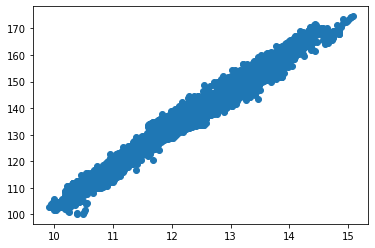

In [15]:
plt.scatter(x="CDP",y="TEY",data=gas)

In [16]:
#they are linearly correlated (0.988)

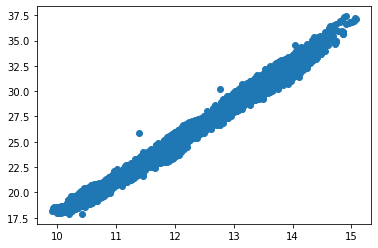

In [17]:
plt.scatter(x="CDP",y="GTEP",data=gas)#they are linearly correlated (0.99)

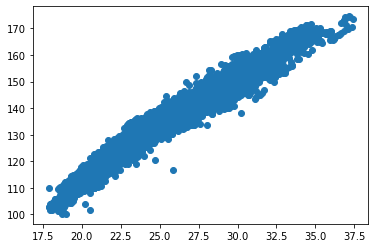

In [18]:
plt.scatter(x="GTEP",y="TEY",data=gas)#which is linerly correlated(0.977)

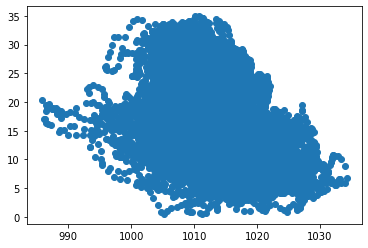

In [19]:
plt.scatter(x="AP",y="AT",data=gas)# not corelated(-0.412)

In [20]:
import seaborn as sns

<AxesSubplot:>

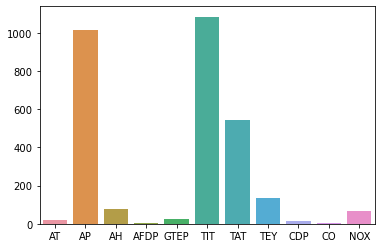

In [21]:
sns.barplot(data=gas)

<AxesSubplot:>

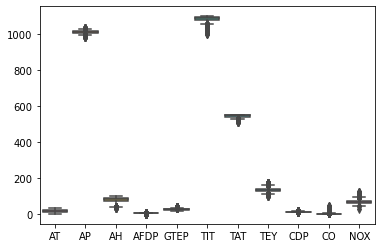

In [22]:
sns.boxplot(data=gas)

(array([[15039.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            29., 15010.],
        [15039.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [15039.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [15039.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0., 15039.],
        [    0.,     0.,     0.,     0., 14896.,   143.,     0.,     0.,
             0.,     0.],
        [  837., 14202.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [15039.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [15039.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [1

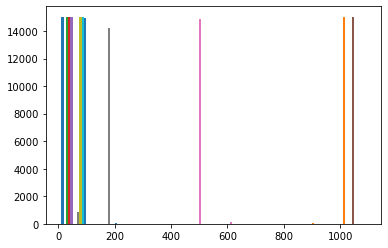

In [23]:
plt.hist(gas)

(array([ 247., 2671.,  474.,  528., 7145.,  462.,  989., 1215., 1160.,
         148.]),
 array([100.17 , 107.614, 115.058, 122.502, 129.946, 137.39 , 144.834,
        152.278, 159.722, 167.166, 174.61 ]),
 <BarContainer object of 10 artists>)

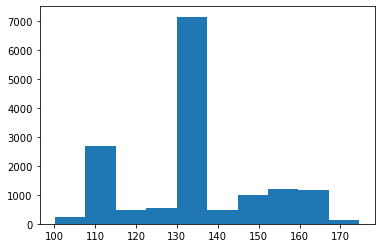

In [24]:
plt.hist(gas['TEY'])

(array([5.000e+00, 1.000e+00, 5.000e+01, 1.630e+02, 3.690e+02, 2.064e+03,
        6.780e+02, 4.960e+02, 4.906e+03, 6.307e+03]),
 array([1000.8, 1010.8, 1020.8, 1030.8, 1040.8, 1050.8, 1060.8, 1070.8,
        1080.8, 1090.8, 1100.8]),
 <BarContainer object of 10 artists>)

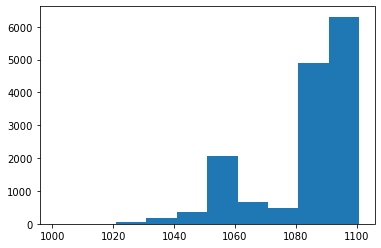

In [25]:
plt.hist(gas['TIT'])

(array([ 659., 2389.,  526., 3345., 4290.,  396., 1098., 1521.,  765.,
          50.]),
 array([ 9.9044 , 10.42206, 10.93972, 11.45738, 11.97504, 12.4927 ,
        13.01036, 13.52802, 14.04568, 14.56334, 15.081  ]),
 <BarContainer object of 10 artists>)

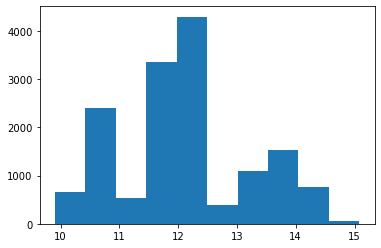

In [26]:
plt.hist(gas['CDP'])

(array([1.000e+00, 2.900e+01, 1.071e+03, 5.096e+03, 5.044e+03, 2.673e+03,
        7.350e+02, 1.890e+02, 1.140e+02, 8.700e+01]),
 array([ 27.765 ,  36.9775,  46.19  ,  55.4025,  64.615 ,  73.8275,
         83.04  ,  92.2525, 101.465 , 110.6775, 119.89  ]),
 <BarContainer object of 10 artists>)

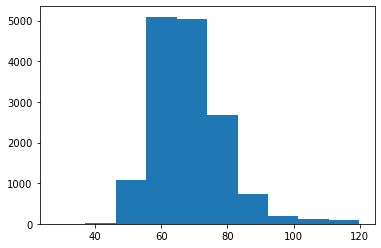

In [27]:
plt.hist(gas['NOX'])

(array([1.3649e+04, 1.1880e+03, 1.5800e+02, 1.3000e+01, 6.0000e+00,
        2.0000e+00, 8.0000e+00, 9.0000e+00, 2.0000e+00, 4.0000e+00]),
 array([3.87510000e-04, 4.41064876e+00, 8.82091001e+00, 1.32311713e+01,
        1.76414325e+01, 2.20516938e+01, 2.64619550e+01, 3.08722163e+01,
        3.52824775e+01, 3.96927388e+01, 4.41030000e+01]),
 <BarContainer object of 10 artists>)

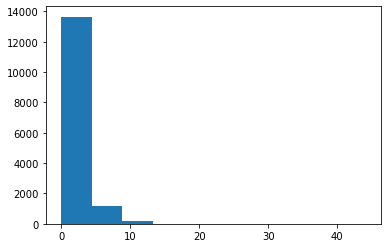

In [28]:
plt.hist(gas['CO'])

(array([1650., 1600., 1276., 4636., 2198.,  462., 1343., 1532.,  305.,
          37.]),
 array([17.878 , 19.8304, 21.7828, 23.7352, 25.6876, 27.64  , 29.5924,
        31.5448, 33.4972, 35.4496, 37.402 ]),
 <BarContainer object of 10 artists>)

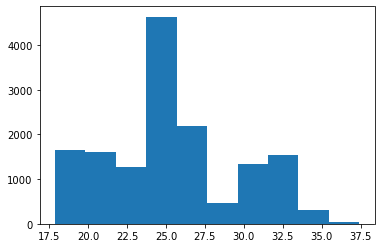

In [29]:
plt.hist(gas['GTEP'])

(array([1.710e+02, 1.317e+03, 2.388e+03, 4.698e+03, 3.924e+03, 1.392e+03,
        8.300e+02, 3.050e+02, 1.000e+01, 4.000e+00]),
 array([2.0874 , 2.63972, 3.19204, 3.74436, 4.29668, 4.849  , 5.40132,
        5.95364, 6.50596, 7.05828, 7.6106 ]),
 <BarContainer object of 10 artists>)

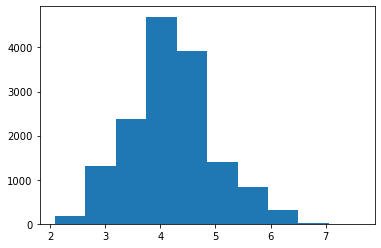

In [30]:
plt.hist(gas['AFDP'])

(array([  26.,  145.,  425.,  864., 1296., 1660., 2036., 2799., 3716.,
        2072.]),
 array([ 30.344 ,  37.3296,  44.3152,  51.3008,  58.2864,  65.272 ,
         72.2576,  79.2432,  86.2288,  93.2144, 100.2   ]),
 <BarContainer object of 10 artists>)

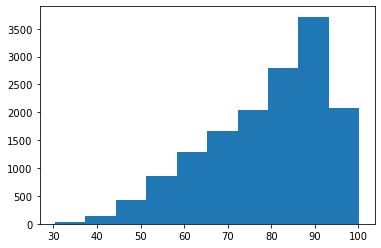

In [31]:
plt.hist(gas['AH'])

(array([  29.,   47.,  206.,  973., 3477., 4783., 3086., 1668.,  697.,
          73.]),
 array([ 985.85 ,  990.685,  995.52 , 1000.355, 1005.19 , 1010.025,
        1014.86 , 1019.695, 1024.53 , 1029.365, 1034.2  ]),
 <BarContainer object of 10 artists>)

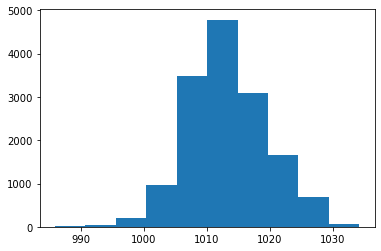

In [32]:
plt.hist(gas['AP'])

(array([ 236., 1297., 1877., 2005., 1880., 2190., 2278., 1884., 1088.,
         304.]),
 array([ 0.5223 ,  3.96297,  7.40364, 10.84431, 14.28498, 17.72565,
        21.16632, 24.60699, 28.04766, 31.48833, 34.929  ]),
 <BarContainer object of 10 artists>)

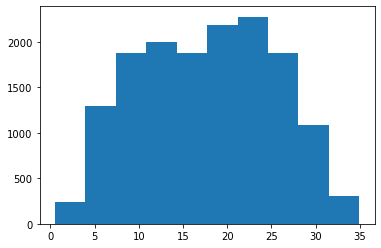

In [33]:
plt.hist(gas['AT'])

(array([   14.,    39.,    85.,   556.,   954.,   776.,   776.,   688.,
          525., 10626.]),
 array([512.45 , 516.266, 520.082, 523.898, 527.714, 531.53 , 535.346,
        539.162, 542.978, 546.794, 550.61 ]),
 <BarContainer object of 10 artists>)

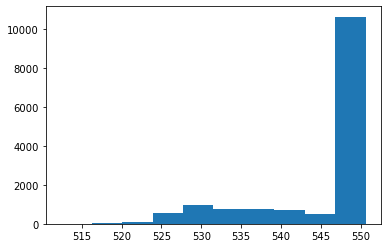

In [34]:
plt.hist(gas['TAT'])

In [35]:
features = gas.columns.tolist()
features.remove('TEY')
features

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX']

In [36]:
X=gas.drop(columns =['TEY',"AFDP","GTEP","TIT","TAT","CDP","CO","NOX"])
y=gas['TEY']

In [37]:
X

,AT,AP,AH
0,6.8594,1007.9,96.799
1,6.7850,1008.4,97.118
2,6.8977,1008.8,95.939
3,7.0569,1009.2,95.249
4,7.3978,1009.7,95.150
...,...,...,...
15034,9.0301,1005.6,98.460
15035,7.8879,1005.9,99.093
15036,7.2647,1006.3,99.496
15037,7.0060,1006.8,99.008


In [38]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.3,random_state =42)

In [41]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((10527, 3), (4512, 3), (10527,), (4512,))

In [42]:
n_features =X.shape[1]
n_features

3

In [43]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from numpy.random import seed
import tensorflow

from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop
import tensorflow
import tensorflow as tf
from tensorflow import keras

In [44]:
optmizer =RMSprop(0.03)#0.01 is a learning rate
model=keras.Sequential([
    keras.layers.Dense(10,input_dim =(n_features),activation='relu'),
    keras.layers.Dense(8,activation ='relu')
])
model.compile(optimizer =optmizer,loss= 'mean_squared_error',metrics=['accuracy'])

In [45]:
seed_value =42;
import random
tensorflow.random.set_seed(seed_value)
model.fit(X_train, y_train, epochs=5, batch_size=30, verbose = 1)

Epoch 1/5
351/351 [==============================] - 2s 2ms/step - loss: 12045.3164 - accuracy: 0.0000e+00
Epoch 2/5
351/351 [==============================] - 1s 2ms/step - loss: 11562.4170 - accuracy: 0.0000e+00
Epoch 3/5
351/351 [==============================] - 1s 2ms/step - loss: 11557.9150 - accuracy: 0.0000e+00
Epoch 4/5
351/351 [==============================] - 1s 2ms/step - loss: 11560.3730 - accuracy: 0.0000e+00
Epoch 5/5
351/351 [==============================] - 1s 2ms/step - loss: 11559.4336 - accuracy: 0.0000e+00


In [46]:
model.evaluate(X_test,y_test)

141/141 [==============================] - 0s 2ms/step - loss: 11552.1973 - accuracy: 0.0000e+00


[11552.197265625, 0.0]

In [47]:
optmizer =RMSprop(0.5)#0.01 is a learning rate
model=keras.Sequential([
    keras.layers.Dense(10,input_dim =(n_features),activation='relu'),
    keras.layers.Dense(8,activation ='relu')
])
model.compile(optimizer =optmizer,loss= 'mean_squared_error',metrics=['accuracy'])

In [48]:
seed_value =42;
import random
tensorflow.random.set_seed(seed_value)
model.fit(X_train, y_train, epochs=10, batch_size=10, verbose = 1)

Epoch 1/10
1053/1053 [==============================] - 3s 2ms/step - loss: 42953.3789 - accuracy: 0.0000e+00
Epoch 2/10
1053/1053 [==============================] - 2s 2ms/step - loss: 16027.6201 - accuracy: 0.0000e+00
Epoch 3/10
1053/1053 [==============================] - 2s 2ms/step - loss: 16027.6484 - accuracy: 0.0000e+00
Epoch 4/10
1053/1053 [==============================] - 2s 2ms/step - loss: 16027.6338 - accuracy: 0.0000e+00
Epoch 5/10
1053/1053 [==============================] - 2s 2ms/step - loss: 16027.6094 - accuracy: 0.0000e+00
Epoch 6/10
1053/1053 [==============================] - 2s 2ms/step - loss: 16027.6621 - accuracy: 0.0000e+00
Epoch 7/10
1053/1053 [==============================] - 2s 2ms/step - loss: 16027.5820 - accuracy: 0.0000e+00
Epoch 8/10
1053/1053 [==============================] - 2s 2ms/step - loss: 16027.6562 - accuracy: 0.0000e+00
Epoch 9/10
1053/1053 [==============================] - 2s 2ms/step - loss: 16027.6348 - accuracy: 0.0000e+00
Epoch 10/1

In [49]:
model.evaluate(X_test,y_test)

141/141 [==============================] - 0s 2ms/step - loss: 15956.8740 - accuracy: 0.0000e+00


[15956.8740234375, 0.0]

In [50]:
y_pred = model.predict(X_test)

141/141 [==============================] - 0s 1ms/step


In [51]:
y_pred[25]

array([  0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
       134.27095,   0.     ], dtype=float32)

In [52]:
y_pred

array([[  0.     ,   0.     ,   0.     , ...,   0.     , 134.27095,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     , 134.27095,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     , 134.27095,
          0.     ],
       ...,
       [  0.     ,   0.     ,   0.     , ...,   0.     , 134.27095,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     , 134.27095,
          0.     ],
       [  0.     ,   0.     ,   0.     , ...,   0.     , 134.27095,
          0.     ]], dtype=float32)